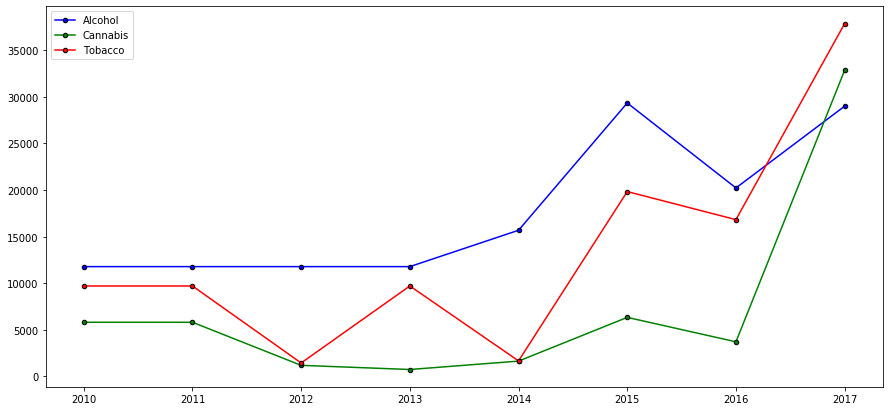

In [46]:
import pandas

from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
#pravim tabele za broj koji koriste odredjena droga u 2013-2017
def fali(dic):
    for key,value in dic.items():
        if(value)==0:
            return True
    return False
def missing(dic):
    if(dic):
        vrednosti=np.array([v for v in dic.values()])
        avg=np.sum(vrednosti)/len(vrednosti)
        for key,value in dic.items():
            if value==0:
                dic[key]=avg
def tabela(fajl,tab):
    c=pandas.read_excel(fajl)
    godine=[v for v in tab.keys()]
    for i,row in c.iterrows():
        if not np.isnan(row["Sample size"]) and not np.isnan(row["Year"]) and not np.isnan(row["Total"]) and row["Year"] in godine:
            sample=row["Sample size"]
            tot=row["Total"]/100
            broj=sample*tot
            god=row["Year"]
            tab[int(god)]+=broj
    missing(tab)
    t=[v for v in tab.values()]
    return t
alcohol={2010:0,2011:0,2012:0,2013:0,2014:0,2015:0,2016:0,2017:0}
amph={2010:0,2011:0,2012:0,2013:0,2014:0,2015:0,2016:0,2017:0}
cannabis={2010:0,2011:0,2012:0,2013:0,2014:0,2015:0,2016:0,2017:0}
cocaine={2010:0,2011:0,2012:0,2013:0,2014:0,2015:0,2016:0,2017:0}
lsd={2010:0,2011:0,2012:0,2013:0,2014:0,2015:0,2016:0,2017:0}
ecstasy={2010:0,2011:0,2012:0,2013:0,2014:0,2015:0,2016:0,2017:0}
tobacco={2010:0,2011:0,2012:0,2013:0,2014:0,2015:0,2016:0,2017:0}
al=tabela("./tables/prevalance/alcohol.xlsx",alcohol)
am=tabela("./tables/prevalance/amph.xlsx",amph)
can=tabela("./tables/prevalance/cannabis.xlsx",cannabis)
coc=tabela("./tables/prevalance/cocaine.xlsx",cocaine)
ls=tabela("./tables/prevalance/lsd.xlsx",lsd)
ecs=tabela("./tables/prevalance/ecstasy.xlsx",ecstasy)
tob=tabela("./tables/prevalance/tobacco.xlsx",tobacco)
godine=[g for g in range(2010,2018)]
plt.figure(figsize=(15,7))
plt.plot(godine,al,color="blue",label="Alcohol",marker = ".", markersize = 9, markeredgecolor = "black")
plt.plot(godine,can,color="green",label="Cannabis",marker = ".", markersize = 9, markeredgecolor = "black")

plt.plot(godine,tob,color="red",label="Tobacco",marker = ".", markersize = 9, markeredgecolor = "black")
plt.legend()
    
    

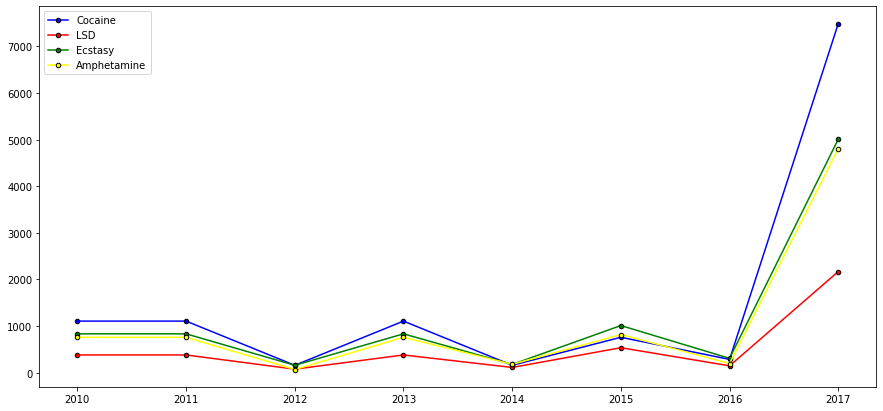

In [45]:
plt.figure(figsize=(15,7))
plt.plot(godine,coc,color="blue",label="Cocaine",marker = ".", markersize = 9, markeredgecolor = "black")
plt.plot(godine,ls,color="red",label="LSD",marker = ".", markersize = 9, markeredgecolor = "black")
plt.plot(godine,ecs,color="green",label="Ecstasy",marker = ".", markersize = 9, markeredgecolor = "black")
plt.plot(godine,am,color="yellow",label="Amphetamine",marker = ".", markersize = 9, markeredgecolor = "black")
plt.legend()